In [59]:
#
# Cab Rides and Weather DataSets
#
# First, let's process ride dataset. 
# you can read it into pandas.DataFrame. 
# Importing necessary libraries to perform functions on dataset in order to do analysis

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data  visualization
import seaborn as sns # advance data visualization
from datetime import datetime # to convert the timestamp into day, time etc

In [61]:
cab_df = pd.read_csv("cab_rides.csv")
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [62]:
# Checking for the null values

cab_df.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [5]:
#We see that price column has 55095 rows missing data.
#Total rows we have 693071 so we can remove the rows with no price.

In [6]:
cab_df.dropna(inplace=True)

cab_df.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [7]:
#No null values.

#First, lets see what columns do we have

In [8]:
cab_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
#We dont need id, product_id. So lets get rid of them

In [9]:
cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name']]

cab_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL


In [ ]:
#We see that time_stamp is Unix, so we need to convert it to the readable form. Using the time_stamp column, 
#lets convert it to date, week day, hour and time of day.

#We calculate time of day into: Morning, Afternoon, Evening and Night

In [63]:
cab_df["rounded_timestamp"] = cab_df["time_stamp"] / 1000
cab_df["rounded_timestamp"] = cab_df["rounded_timestamp"].apply(np.floor)

cab_df["date"] = cab_df["rounded_timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
cab_df["time"] = cab_df["rounded_timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
cab_df['weekday'] = cab_df['date'].apply(lambda x: x.weekday())
cab_df["weekday"] = cab_df["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
cab_df['hour'] = cab_df['time'].apply(lambda time: time.hour)

cab_df.loc[(cab_df.hour >= 6) & (cab_df.hour < 12) , 'time_of_day'] = 'Morning'
cab_df.loc[(cab_df.hour >= 12) & (cab_df.hour < 15) , 'time_of_day'] = 'Afternoon'
cab_df.loc[(cab_df.hour >= 15) & (cab_df.hour < 18) , 'time_of_day'] = 'Evening'
cab_df.loc[(cab_df.hour >= 18) | (cab_df.hour < 6) , 'time_of_day'] = 'Night'

cab_df = cab_df[['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'date', 'time', 'weekday', 'hour', 'time_of_day']]

cab_df.head(7)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,date,time,weekday,hour,time_of_day
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16,01:30:07,Sunday,1,Night
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-26,18:00:23,Monday,18,Night
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-27,17:00:22,Tuesday,17,Evening
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-29,20:53:02,Thursday,20,Night
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-28,19:49:20,Wednesday,19,Night
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,Lux Black,2018-12-17,10:25:12,Monday,10,Morning
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,Lyft XL,2018-11-25,21:03:00,Sunday,21,Night


In [11]:
#Data Analysis Part




#Factors affecting the Surge Factor
#Surge correlation with price and distance

In [12]:
cab_df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [13]:
#So above we can see we have two cab types: Uber and Lyft So we need to separate the datasets

In [14]:
uber_df = cab_df[cab_df['cab_type'] =="Uber"]
lyft_df = cab_df[cab_df['cab_type'] =="Lyft"]

In [15]:
#To find the correlation, we need to pick up numeric values.

In [16]:
lyft_df = cab_df[cab_df["cab_type"] == "Lyft"]
uber_ds = cab_df[cab_df['cab_type'] == "Uber"]

uber_ds_corr = uber_ds[["distance", "price", "surge_multiplier"]]
lyft_df_corr = lyft_df[["distance", "price", "surge_multiplier"]]

<AxesSubplot:>

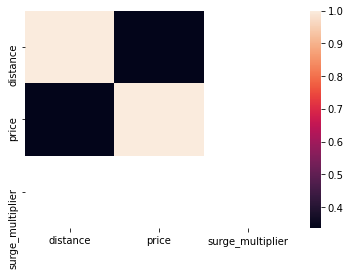

In [64]:
sns.heatmap(uber_ds_corr.corr())

<AxesSubplot:>

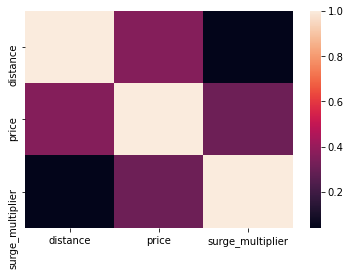

In [65]:
sns.heatmap(lyft_df_corr.corr())

In [19]:
#From above we learn:

#For lyft: Surge Multiplier and Distance are weakly correlated
#For lyft: Surge Multiplier and Price are more correlated than above pair
#For Uber: Price and Distance are weakly correlated

In [ ]:

#Now we find when the Surge is high according to the Day of Week
#First we see the value counts for the Uber and Lyft

In [66]:
uber_df["surge_multiplier"].value_counts()

1.0    330568
Name: surge_multiplier, dtype: int64

In [67]:
lyft_df["surge_multiplier"].value_counts()

1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [21]:
#From above we see that for Uber we have only one value of surge multiplier

#So we consider the surge multiplier for Lyft only and plot which day it is highest. 
#We only consider the surge multiplier > 1.

In [68]:
high_surge_dataset = lyft_df[lyft_df["surge_multiplier"]> 1]

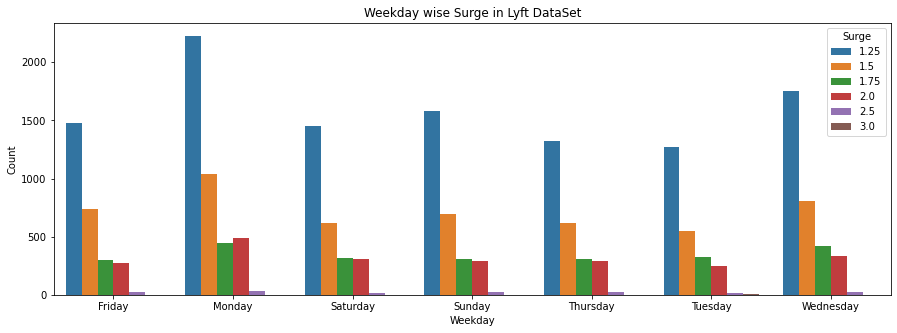

In [75]:
t_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier"]).size().reset_index())
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title("Weekday wise Surge in Lyft DataSet");

In [24]:
#We learn that

#Surge 1.25 is happening most. 
#Monday is the day when you are most likely to encounter it and Tuesday is the day when its most unlikely.
#3.0 is very unlikely to happen

In [ ]:
#Surge and Time of Day for Lyft dataset

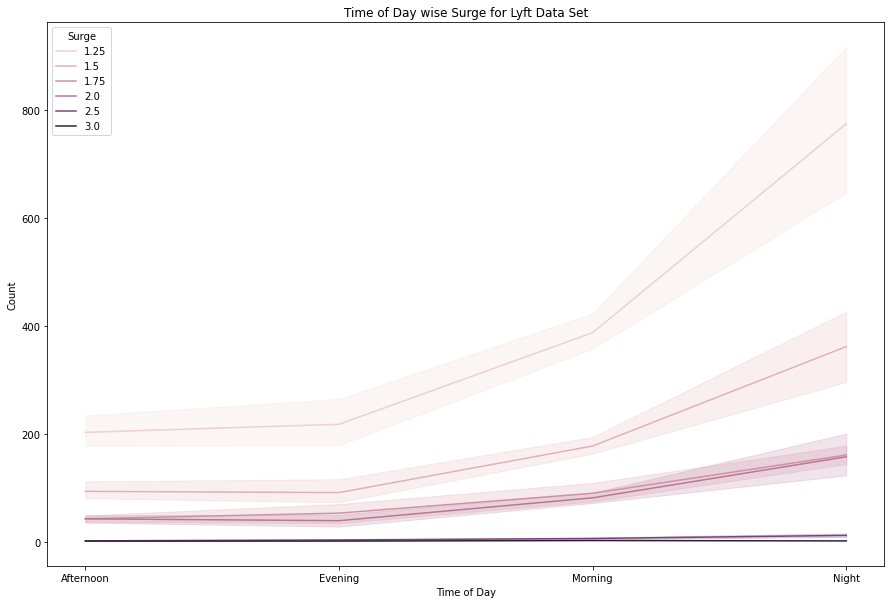

In [76]:
td_high_surge = pd.DataFrame(high_surge_dataset.groupby(["weekday", "surge_multiplier","time_of_day"]).size().reset_index())
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]

plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title("Time of Day wise Surge for Lyft Data Set");

In [ ]:
#Night sees the most Surge
#Afternoon and Evening the least
#Morning also witnesses surge 

In [ ]:
#Surge and Distance
#Now lets try to study the surge, price and distance.
#We are trying to see if one of the value affects another for both the brands.

In [26]:
uber_dis_price_surge = uber_df[['distance', 'surge_multiplier', 'price']]
lyft_dis_price_surge = lyft_df[['distance', 'surge_multiplier', 'price']]

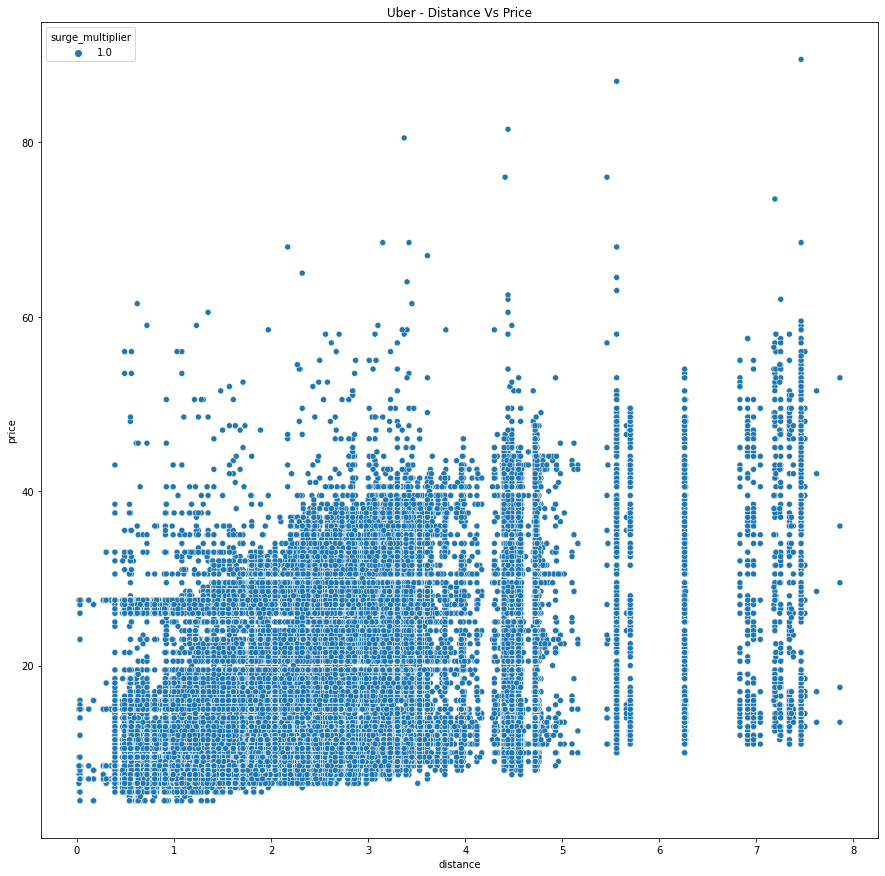

In [27]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=uber_dis_price_surge, x="distance", y="price", hue="surge_multiplier").set_title("Uber - Distance Vs Price");

In [ ]:
#Now, from above we learn that distance and price are not strongly correlated. 
#As the distance increases, price does not increase linearly.

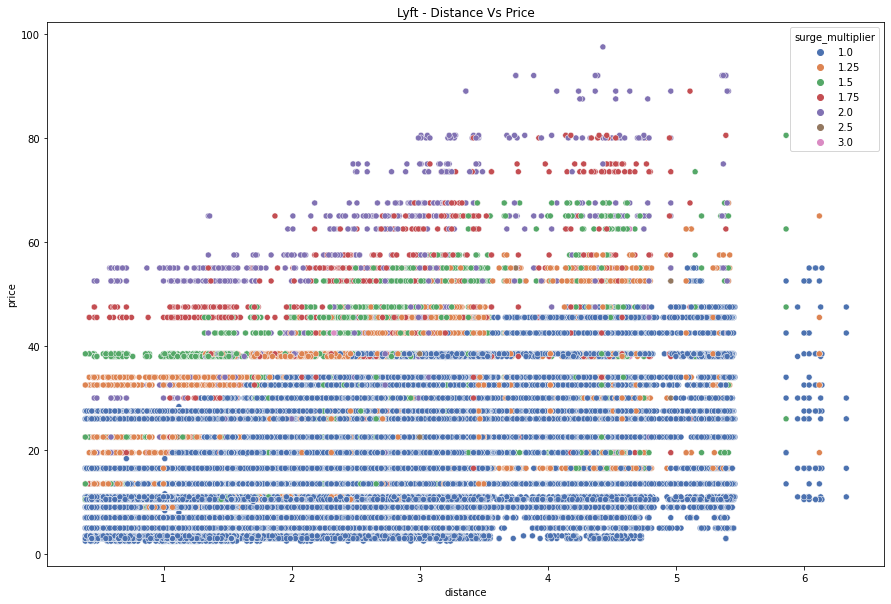

In [28]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=lyft_dis_price_surge, x="distance", y="price", hue="surge_multiplier", palette="deep").set_title("Lyft - Distance Vs Price");

In [29]:
#So as the distance increases, price increases.
#We also see that with higher prices, more surge multiplier increases

In [30]:
#Top 5 Source destinations
#For Uber

In [31]:
uber_s_d_df= uber_df.groupby(['source', "destination"]).size().reset_index()
uber_s_d_df.columns = ["source", "destination", "count"]
uber_s_d_df.sort_values("count", inplace=True, ascending = False)
uber_five_most = uber_s_d_df.iloc[0:5, ]
uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]

# So the top five most Source - Destination for Uber
uber_five_most = uber_five_most[["Source - Destination", "count"]]
uber_five_most

<ipython-input-31-f96d23845561>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_five_most["Source - Destination"] = uber_s_d_df["source"] + " - " + uber_s_d_df["destination"]


,Source - Destination,count
29,Financial District - South Station,4908
56,South Station - Financial District,4908
36,North End - Back Bay,4866
3,Back Bay - North End,4866
67,West End - Fenway,4830


In [32]:
#For Lyft

In [33]:
lyft_s_d_df= lyft_df.groupby(['source', "destination"]).size().reset_index()
lyft_s_d_df.columns = ["source", "destination", "count"]
lyft_s_d_df.sort_values("count", inplace=True, ascending = False)
lyft_five_most = lyft_s_d_df.iloc[0:5, ]
lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]

# So the top five most Source - Destination for lyft
lyft_five_most = lyft_five_most[["Source - Destination", "count"]]
lyft_five_most

<ipython-input-33-0f7adaaef173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_five_most["Source - Destination"] = lyft_s_d_df["source"] + " - " + lyft_s_d_df["destination"]


,Source - Destination,count
56,South Station - Financial District,4626
29,Financial District - South Station,4626
36,North End - Back Bay,4548
3,Back Bay - North End,4548
67,West End - Fenway,4530


In [ ]:
#Which destinations attract more surge and which are least
#Here we pick only those rows which have surge greater than or equal to 2

In [34]:
high_surge_rows = cab_df[cab_df["surge_multiplier"] >= 2]
loc_wise_surge = high_surge_rows.groupby(["source", "destination"]).size().reset_index()

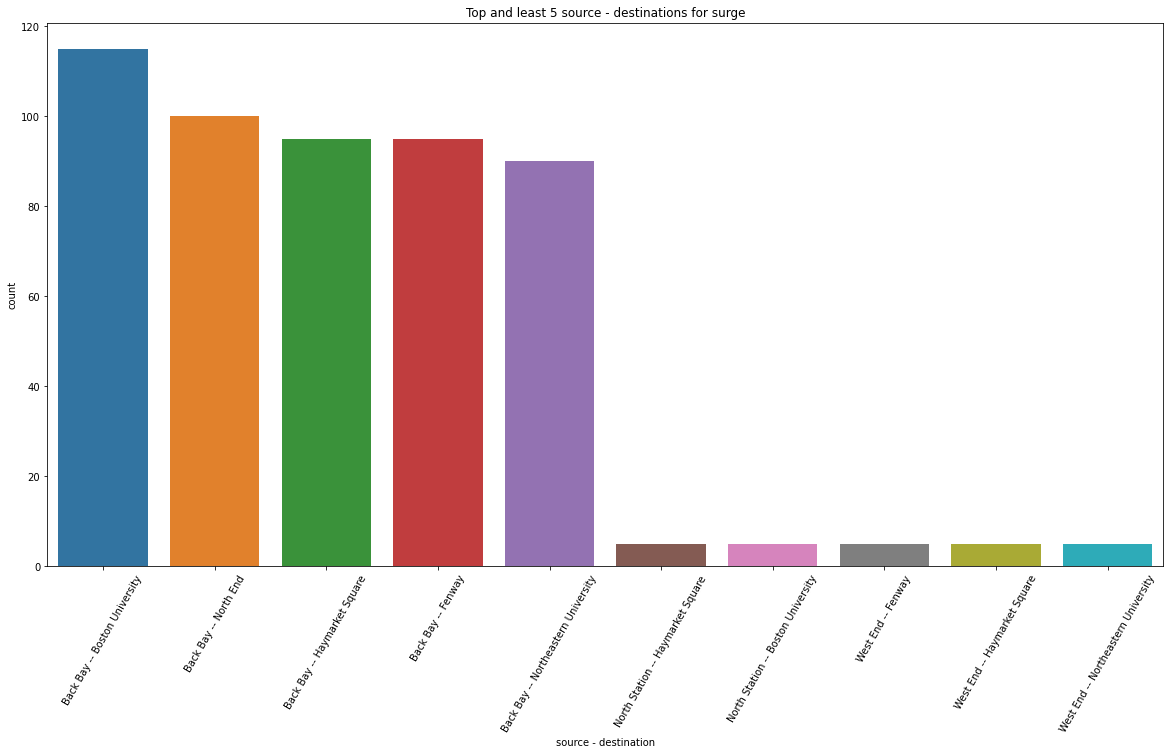

In [80]:
loc_wise_surge.columns=["source", "destination", "count"]
loc_wise_surge.sort_values(inplace=True, ascending=False, by=["count"])


highest_destination_surge = loc_wise_surge.head(5)
lowest_destination_surge = loc_wise_surge.tail(5)
# highest_destination_surge
destination_surge_df = highest_destination_surge.append(lowest_destination_surge, ignore_index=True)
destination_surge_df["source - destination"] = destination_surge_df["source"] + " -- " + destination_surge_df["destination"]
plt.figure(figsize=(20, 10))
g = sns.barplot(data = destination_surge_df, x = "source - destination", y = "count")
g.set_title("Top and least 5 source - destinations for surge")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60);

In [36]:
#Shared Rides
#In the Lyft rides, we can see that there are some shared rides as well.

#Now, lets see when do people want to have these

In [37]:
lyft_df["name"].value_counts()

Lyft XL         51235
Lyft            51235
Lux Black XL    51235
Lux             51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [ ]:
#From above we see that some 51233 rides in our dataset are shared. 
#Let us study these shared rides with time of day along with along with distance and price factor.

In [ ]:
#Shared Rides with Time of Day

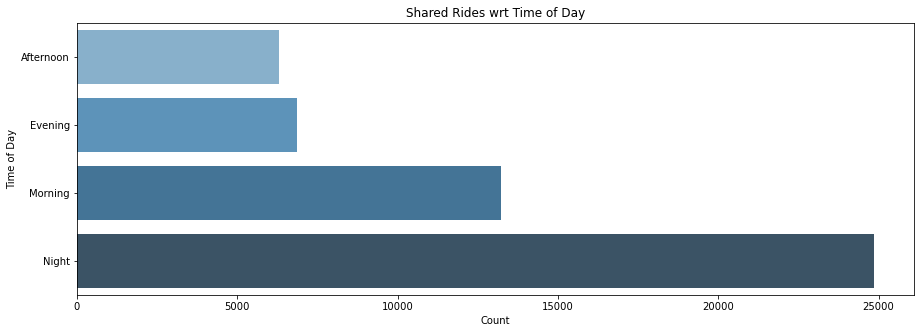

In [38]:
lyft_shared_rides_df = lyft_df[lyft_df["name"] == "Shared"]
lyft_shared_ride_td = lyft_shared_rides_df.groupby(["name", "time_of_day"]).size().reset_index()
lyft_shared_ride_td.columns = ["Name", "Time of Day", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(y="Time of Day", x="Count", data=lyft_shared_ride_td, palette="Blues_d", orient ='h' ).set_title("Shared Rides wrt Time of Day");

In [ ]:
#So people are more preferring to have shared rides during the night than any other time of the day.
#This might be due to the surge

In [ ]:
#Shared rides with Distance and Price

In [ ]:
#Does the Distance and Price affect the Shared Rides? Lets try to understand

In [39]:
lyft_shared_rides_distance_price = lyft_shared_rides_df.groupby(["name", "distance", "price"]).size().reset_index()
lyft_shared_rides_distance_price.columns = ["name", "distance", "price", "count"]

In [40]:
lyft_shared_rides_distance_price

,name,distance,price,count
0,Shared,0.39,2.5,1
1,Shared,0.39,3.0,4
2,Shared,0.39,3.5,1
3,Shared,0.39,5.0,36
4,Shared,0.39,7.0,1
...,...,...,...,...
2778,Shared,6.12,10.5,1
2779,Shared,6.12,13.5,1
2780,Shared,6.13,11.0,1
2781,Shared,6.14,10.5,1


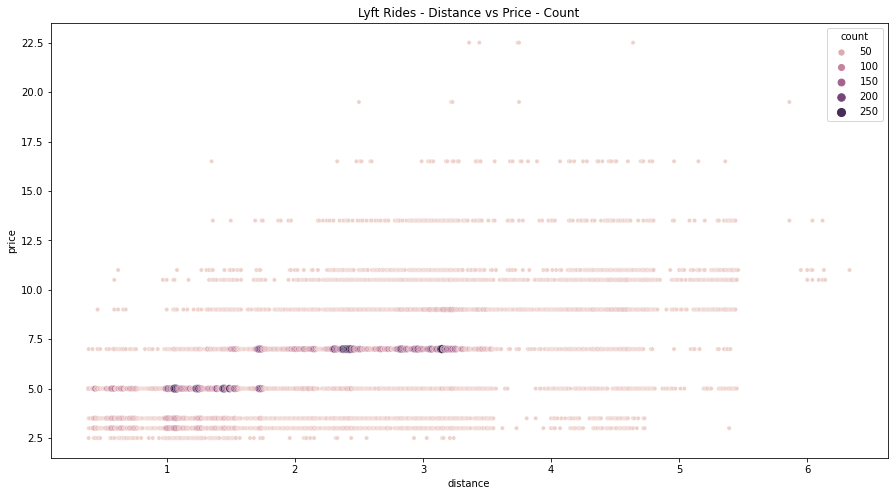

In [41]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = lyft_shared_rides_distance_price, x = "distance", y="price", hue="count", size="count").set_title("Lyft Rides - Distance vs Price - Count");

In [42]:
#Now from above we can see as the distance increases, price tends to increase, 
#however shared rides are not affected. People prefer taking shared rides over the courses of small rides,
#roughly lying between 1 to 3 kilometers.

In [ ]:
#Understanding with Weather
#If you look at the downloaded dataset, you will find out that there is another file called weather.csv.
#Lets try to see what we can get from it.

In [44]:
weather_df = pd.read_csv("weather.csv")
cab_weather_df = pd.read_csv("cab_rides.csv")

In [45]:
#Columns of this dataset are already self explanatory. We need to merge the weather data with the cab data.
#To perform this, we need to execute a series of steps.

#First, we need to scale the timestamp of cab data to weather data
#Next, we will be applying floor, since the timestamp cannot be floating point.
#To merge, we need to convert the type of timestamp of cab data to int. 
#We shall also need to change the column name of the weather data to source so that we can merge the data

In [46]:
cab_weather_df["time_stamp"] = cab_weather_df["time_stamp"] / 1000
cab_weather_df["time_stamp"] = cab_weather_df["time_stamp"].apply(np.floor)

In [47]:
cab_weather_df["time_stamp"] = cab_weather_df["time_stamp"].astype(int)
weather_df.columns = ['temp', 'source', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity', 'wind']
weather_df.isnull().sum()

temp             0
source           0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [48]:
merged_data = pd.merge(weather_df, cab_weather_df, on=["source", "time_stamp"])

In [ ]:
#Understanding count and temperature effect

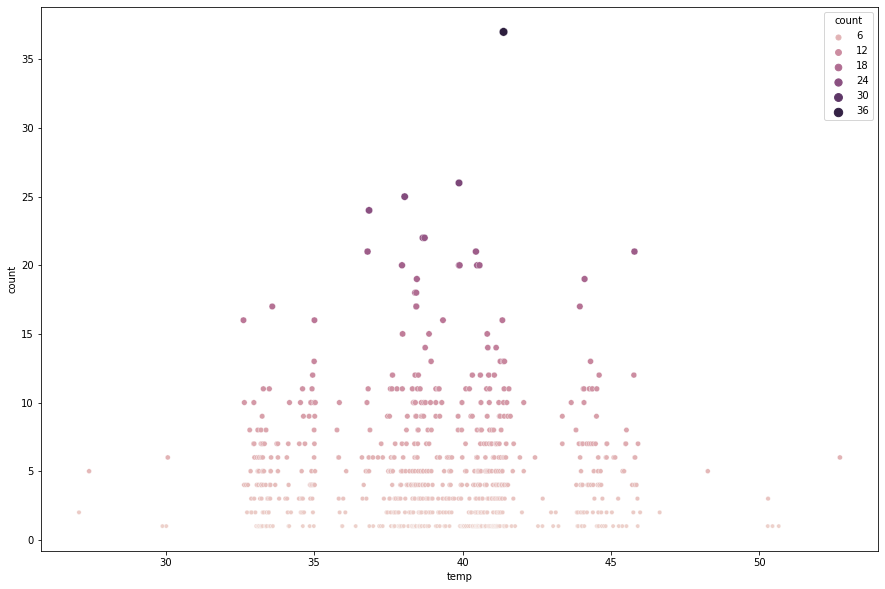

In [49]:
tmp_merged_data = merged_data[['temp', 'source', 'time_stamp', 'cab_type', 'destination',
       'surge_multiplier',  'name']]
tmp_merged_data_g =  tmp_merged_data.groupby(["temp", "source"]).size().reset_index()
tmp_merged_data_g.columns = ["temp", "source", "count"]
plt.figure(figsize=(15, 10))
sns.scatterplot( data = tmp_merged_data_g, x ="temp", y = "count", size="count", hue="count");

In [50]:
#From above we can see that as the temperature increases, count of rides also increase.
#However if the temperature execdes beyond 45(unit), count tends to decreases

In [ ]:
#Understanding count and rain effect

In [51]:
rain_merged_data = merged_data[['source', 'time_stamp', 'cab_type',  "rain"]]
len(rain_merged_data)
rain_merged_data.isnull().sum()

source           0
time_stamp       0
cab_type         0
rain          3457
dtype: int64

In [52]:
#Where there are null values, replace them with 0 as there was no rain.

In [53]:
rain_merged_data["rain"] = rain_merged_data["rain"].fillna(value=0)

<ipython-input-53-22fa3c30d1a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_merged_data["rain"] = rain_merged_data["rain"].fillna(value=0)


<AxesSubplot:xlabel='rain', ylabel='count'>

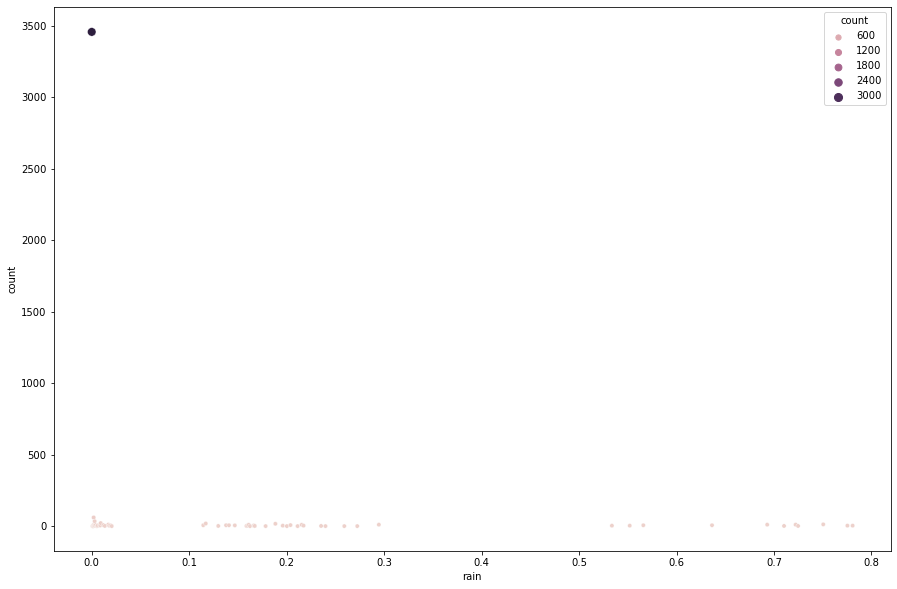

In [54]:
t_rain = rain_merged_data.groupby(["rain"]).size().reset_index()
t_rain.columns=["rain", "count"]
plt.figure(figsize=(15, 10))
sns.scatterplot(data = t_rain, x = "rain", y="count", hue="count", size="count")

In [55]:
#Above we get an idea of the pattern. We have three clusters. What is evident is:

#Rides are most when there is little or no rain
#Then when it rains between 0.1 to 0.3 mm, people take lesser rides
#Between 0.3 to 0.5 we do not have much data. When taking a decision, this data will be needed.
#Then beyond 0.5, as the rain increases, rides do not increase

In [ ]:
#Which company gets more rides during rains?

In [56]:
rain_merged_data.head()

,source,time_stamp,cab_type,rain
0,Back Bay,1543449727,Lyft,0.0
1,Back Bay,1543449727,Uber,0.0
2,Back Bay,1543449727,Uber,0.0
3,Back Bay,1543449727,Uber,0.0
4,Back Bay,1543449727,Uber,0.0


In [57]:
only_rain_data = rain_merged_data[rain_merged_data["rain"] != 0]
print(len(only_rain_data))

409


In [ ]:
#We have only 409 rows where there is rain data available. 
#Very less but lets see which company is getting more rides during rains

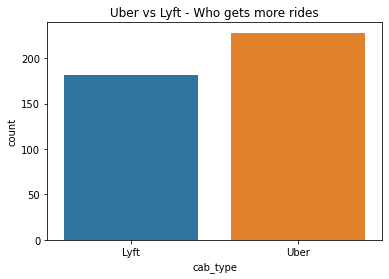

In [58]:
c_only_rain = only_rain_data.groupby(["cab_type"]).size().reset_index()
c_only_rain.columns = ["cab_type", "count"]
sns.barplot(x ="cab_type", y="count", data=c_only_rain).set_title("Uber vs Lyft - Who gets more rides");